In [2]:
import pandas as pd

# Load the preprocessed data
data = pd.read_csv("../data/preprocessed_data.csv")
print(data.info())


C:\Users\Admin\AppData\Local\Temp\ipykernel_8904\1233646363.py:4: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/preprocessed_data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      1000098 non-null  object 
 9   AccountType               1000098 non-null  object 
 10  MaritalStatus             1000098 non-null  object 
 11  Gender                    1000098 non-null  object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [3]:
print(data.isnull().sum())

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                          0
NumberOfDoors               

In [4]:
from scipy.stats import f_oneway

# Group TotalClaims by Province
province_groups = [group['TotalClaims'] for _, group in data.groupby('Province')]

# Perform ANOVA
f_stat, p_value = f_oneway(*province_groups)

print(f"ANOVA F-statistic: {f_stat}")
print(f"p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant differences in risks accross provinces (Reject H₀).")
else:
    print("No significant differences in risks accross provinces (Fail to reject H₀).")

ANOVA F-statistic: 5.84941376240761
p-value: 1.6782057588675903e-07
Significant differences in risks accross provinces (Reject H₀).


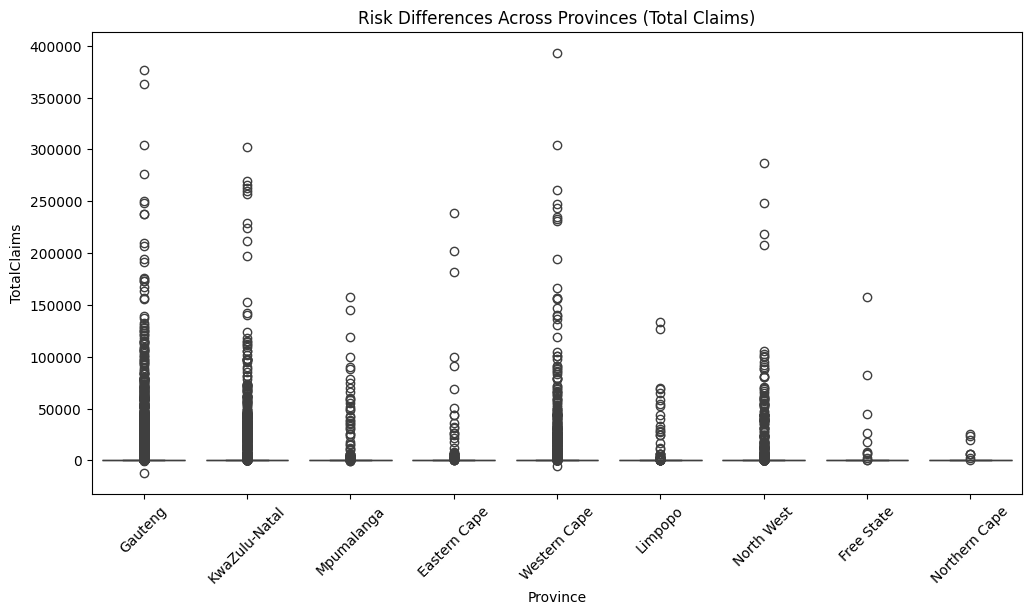

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of TotalClaims by Province
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Province', y='TotalClaims')
plt.title("Risk Differences Across Provinces (Total Claims)")
plt.xticks(rotation=45)
plt.show()

In [6]:
# Prepare data for analysis
zip_code_data = data[['PostalCode', 'TotalClaims']]

# Check for sufficient representation of zip codes
print(zip_code_data['PostalCode'].value_counts().head())


PostalCode
2000    133498
122      49171
7784     28585
299      25546
7405     18518
Name: count, dtype: int64


In [7]:
import scipy.stats as stats

# Group data by postal codes
groups_zip = [group["TotalClaims"].values for _, group in zip_code_data.groupby("PostalCode")]

# Perform ANOVA
anova_stat_zip, p_value_zip = stats.f_oneway(*groups_zip)

print(f"ANOVA F-statistic: {anova_stat_zip}")
print(f"p-value: {p_value_zip}")

# Interpret results
if p_value_zip < 0.05:
    print("Significant differences in risks across zip codes (Reject H₀).")
else:
    print("No significant differences in risks across zip codes (Fail to reject H₀).")


ANOVA F-statistic: 0.9419762214391834
p-value: 0.8906511279164051
No significant differences in risks across zip codes (Fail to reject H₀).


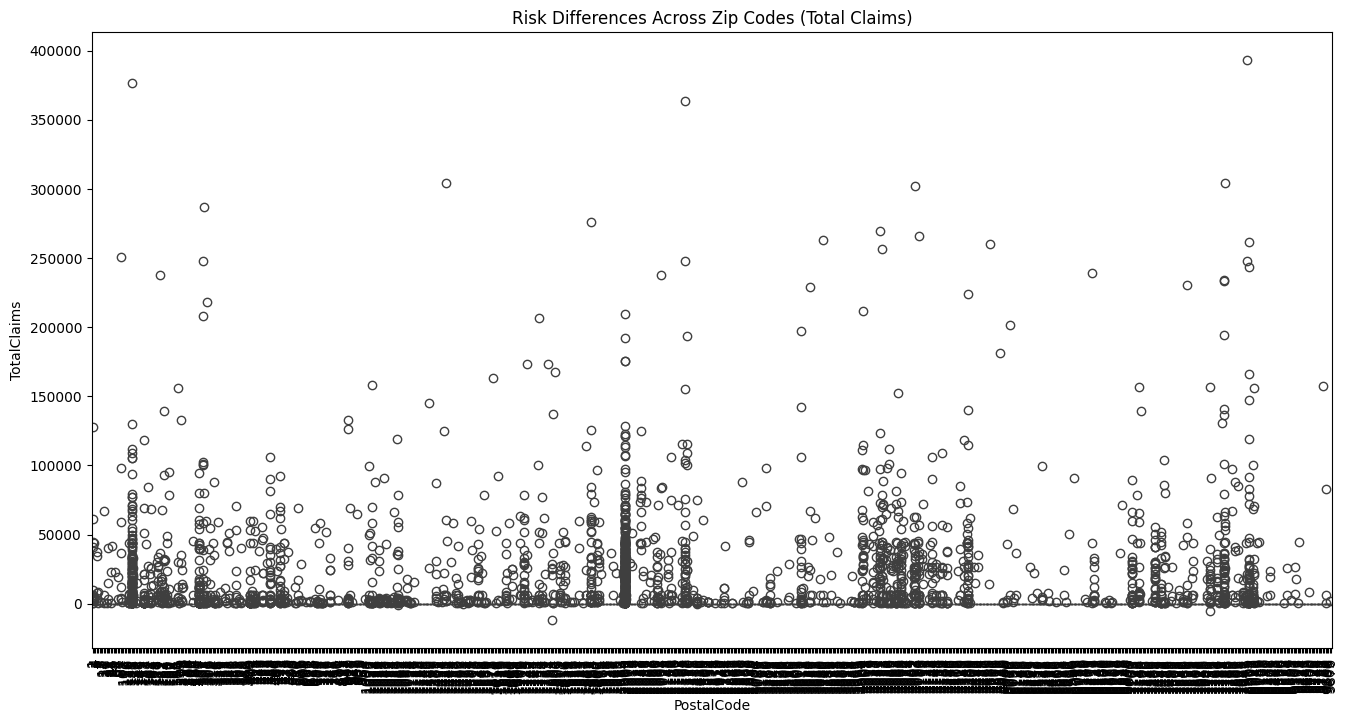

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(x="PostalCode", y="TotalClaims", data=zip_code_data)
plt.xticks(rotation=90)
plt.title("Risk Differences Across Zip Codes (Total Claims)")
plt.show()

PostalCode
2000    133498
122      49171
7784     28585
299      25546
7405     18518
Name: count, dtype: int64
ANOVA F-statistic for Margin: 1.0505752146338962
p-value: 0.39636410456728266
No significant margin differences between zip codes (Fail to reject H₀).


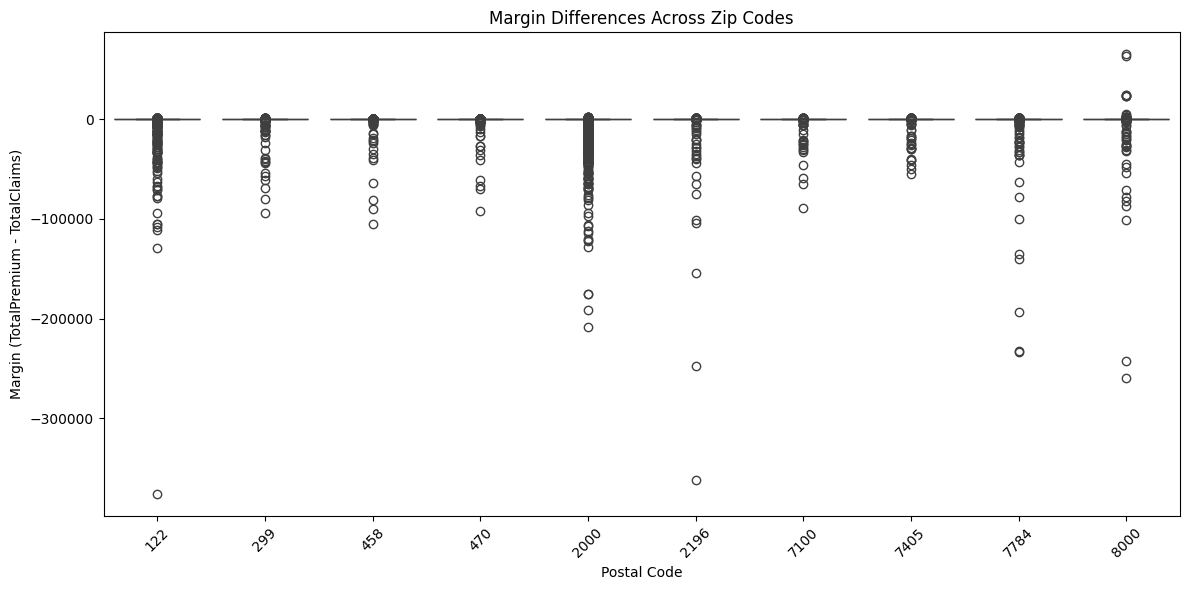

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Calculate margins
data['Margin'] = data['TotalPremium'] - data['TotalClaims']

# Check for sufficient representation of zip codes
print(data['PostalCode'].value_counts().head())

# Prepare data for statistical test
zip_codes_to_include = data['PostalCode'].value_counts().head(10).index  # Use top 10 zip codes for clarity
filtered_data = data[data['PostalCode'].isin(zip_codes_to_include)]

# Group data by PostalCode
grouped_data = [filtered_data[filtered_data['PostalCode'] == code]['Margin'] for code in zip_codes_to_include]

# Perform ANOVA test
anova_margin_f_stat, anova_margin_p_value = f_oneway(*grouped_data)

# Print results
print(f"ANOVA F-statistic for Margin: {anova_margin_f_stat}")
print(f"p-value: {anova_margin_p_value}")

if anova_margin_p_value < 0.05:
    print("Significant margin differences between zip codes (Reject H₀).")
else:
    print("No significant margin differences between zip codes (Fail to reject H₀).")

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='PostalCode', y='Margin', data=filtered_data)
plt.title("Margin Differences Across Zip Codes")
plt.xlabel("Postal Code")
plt.ylabel("Margin (TotalPremium - TotalClaims)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

T-statistic: -0.296353891400699
P-value: 0.7669656471629474


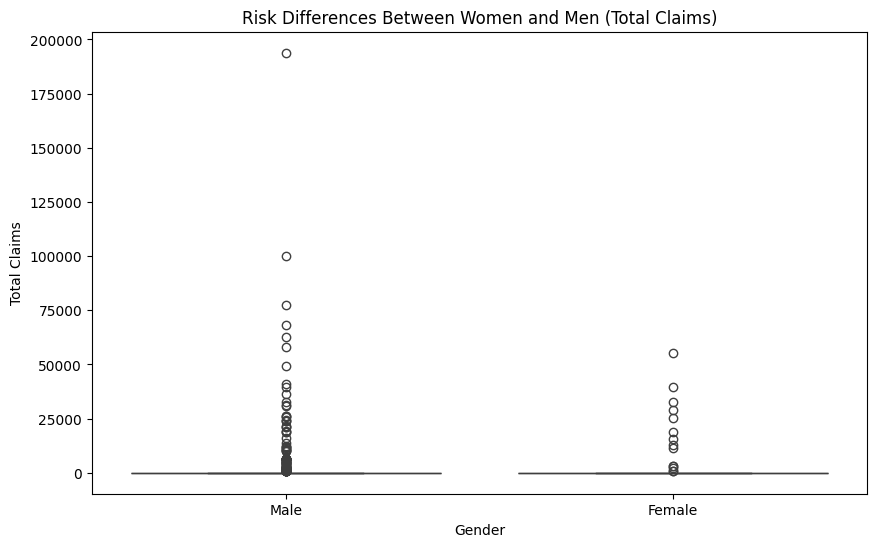

In [10]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for gender-specific TotalClaims
gender_data = data[data['Gender'].isin(['Male', 'Female'])]
male_claims = gender_data[gender_data['Gender'] == 'Male']['TotalClaims']
female_claims = gender_data[gender_data['Gender'] == 'Female']['TotalClaims']

# Perform t-test
t_stat, p_value = ttest_ind(male_claims, female_claims, equal_var=False)  # Welch's t-test for unequal variances
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='TotalClaims', data=gender_data)
plt.title("Risk Differences Between Women and Men (Total Claims)")
plt.ylabel("Total Claims")
plt.xlabel("Gender")
plt.show()